In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
data=pd.read_csv('Stress-Lysis.csv')
data.head()  # displays the first five rows of the dataframe

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [5]:
data.shape  # returns a tuple of array dimension that specifies the number of rows and columns
data.info()  # prints the information about the dataframe
data.describe()  # returns the statistical summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step_count    2001 non-null   int64  
 3   Stress_Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


,Humidity,Temperature,Step_count,Stress_Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


In [25]:
data['Stress_Level'].unique()
#2. Check for missing values and handle them.

data.isnull().sum()
#3.Check for duplicate values

data.duplicated().sum()

0

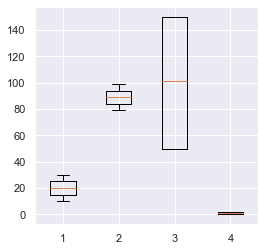

In [28]:
data.skew()
plt.figure(figsize=(4,4))
plt.boxplot(data) #shows distribution of data and its median
plt.show()

In [8]:
# Logarithmic Transformation
hum_log = np.log(data['Humidity'])
h = round(hum_log.skew(),10)
print(h)

-0.3790364332


In [9]:
# SquareRoot Transformation
temp_sqrt = np.sqrt(data['Temperature'])
temp_sqrt.skew()
t = round(temp_sqrt.skew(),10)
print(t)
quantile1=data["Step_count"].quantile(0.25)
quantile2=data["Step_count"].quantile(0.75)

-0.0390881104


In [10]:
quantile1
quantile2
data["Step_count"]=np.where(data["Step_count"]<quantile1,quantile1,data["Step_count"])
data["Step_count"]=np.where(data["Step_count"]>quantile2,quantile2,data["Step_count"])
s = round(data['Step_count'].skew(),10)
print(s)

-0.0094975784


In [11]:
# SquareRoot Transformation
stress_sqrt = np.sqrt(data['Stress_Level']) #applies sqrt to every element of the column
sl = round(stress_sqrt.skew(),10) #calculates the skewness(symmetric[mean=median=mode] or skewed to oneside(righttail[mean>median>mode] or lefttail))
print(sl)

-0.7944935599


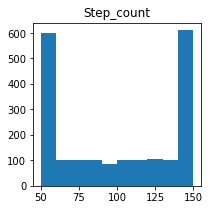

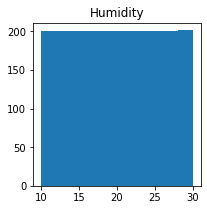

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

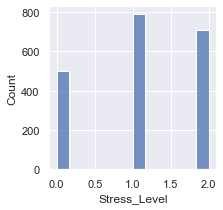

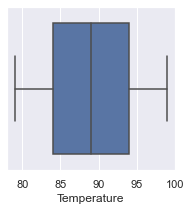

In [12]:
column=['Step_count','Humidity']
for category in column:
    plt.figure(figsize=(3,3))
    plt.hist(data[category])
    plt.title(category)
    plt.show() #shows histograph for stepcount and humidity separately
# histplot (categorical) 
plt.figure(figsize=(3,3))
sns.set(font_scale=1)
sns.histplot(data=data, x='Stress_Level')
plt.figure(figsize=(3,3))
sns.boxplot(data['Temperature'])

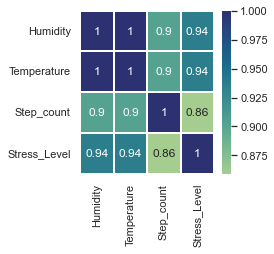

In [13]:
correlation = data.corr()
correlation
plt.figure(figsize=(3,3))
sns.heatmap(correlation,annot=True,cmap='crest',linewidths=0.2) #finds correlation between two columns in the dataframe(-1,0,1)
plt.show()

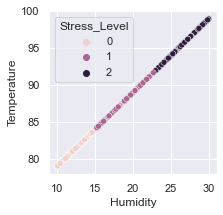

In [14]:
plt.figure(figsize=(3,3))
sns.scatterplot(x='Humidity',y='Temperature',hue='Stress_Level',data=data)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=data.drop(['Stress_Level'],axis=1)
y=data['Stress_Level']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
regressor = LogisticRegression(C=1.0,random_state=0)
scaler=preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)

regressor.fit(X_train,y_train)

from sklearn.metrics import accuracy_score, confusion_matrix
prediction = regressor.predict(X_test)
confusionmatrix = confusion_matrix(y_test,prediction)
print(confusionmatrix)

print(accuracy_score(y_test,prediction))

[[134   0   0]
 [  2 250   0]
 [  0   0 215]]
0.9966722129783694


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  
y_predict= classifier.predict(X_test)
score=accuracy_score(y_test,y_predict)
print(score)

0.9950083194675541


In [18]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
#confusionmatrix = confusion_matrix(y_test,prediction)
#print(confusionmatrix)
print(accuracy_score(y_test,prediction))

0.9933444259567388


In [19]:
import pickle

In [20]:
filename = 'stress_trained.sav'
pickle.dump(classifier,open(filename,'wb'))

In [21]:
loaded_model = pickle.load(open('stress_trained.sav','rb'))
# Download the stress_trained.sav model 

In [22]:
# Evaluating

input_data = (11.05,80.05,14) #300
#changing the input data into numpy array
id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = classifier.predict(id_reshaped)
print(prediction)
#print(accuracy_score(X_test,prediction))
if(prediction[0]==0):
    print("Stress Level: LOW")
elif(prediction[0]==1):
    print("Stress Level: MEDIUM")
else:
    print("Stress Level: HIGH")
    
input_data = (21.38,90.38,128) #100
#changing the input data into numpy array
id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = classifier.predict(id_reshaped)
print(prediction)

if(prediction[0]==0):
    print("Stress Level: LOW")
elif(prediction[0]==1):
    print("Stress Level: MEDIUM")
else:
    print("Stress Level: HIGH")
    
input_data = (25.41,94.41,167) #200
#changing the input data into numpy array
id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = classifier.predict(id_reshaped)
print(prediction)

if(prediction[0]==0):
    print("Stress Level: LOW")
elif(prediction[0]==1):
    print("Stress Level: MEDIUM")
else:
    print("Stress Level: HIGH")

[2]
Stress Level: HIGH
[2]
Stress Level: HIGH
[2]
Stress Level: HIGH
